# Wildfire Detection Classification Images 

## Goal :

### Our objective is to differentiate between an image that shows forest with fire from an image of forrest without fire, using Transfer Learning 

### Data :
### The dataset dowloaded is from [Kaggle](https://www.kaggle.com/datasets/brsdincer/wildfire-detection-image-data)



### Import Packages 

In [1]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import random as rn
from pathlib import Path
import pathlib
import os.path
import os
os.environ['PYTHONHASHSEED'] = '0'


import matplotlib.pyplot as plt
import seaborn as sbn
import plotly.express as px

from PIL import Image
import PIL
import cv
import glob


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import *
from keras import models, layers, optimizers                  
from tensorflow.keras.models import load_model

import tensorflow.keras.applications.xception as xc
from tensorflow.keras.applications import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.applications import ResNet50



2022-12-21 22:21:09.403435: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 22:21:14.380218: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-21 22:21:14.380349: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-21 22:21:36.825208: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

### Exploratory Data Analysis

In [2]:
### Loading data 
train = Path("")

train_dir = Path('./forest_fire_data/Training_and_Validation')
train_filepaths = list(train_dir.glob('*/*.jpg'))

test_dir = Path('./forest_fire_data/Testing')
test_filepaths = list(test_dir.glob('*/*.jpg'))

In [3]:
image_count_train = len(list(train_dir.glob('*/*.jpg')))
print(image_count_train)

image_count_test = len(list(test_dir.glob('*/*.jpg')))
print(image_count_test)

1832
68


###  Distrubution of Data 

In [4]:
class_names = ['Train', 'Test'] 

n_train = len(os.listdir('./forest_fire_data/Training_and_Validation/nofire'))+ len(os.listdir('./forest_fire_data/Training_and_Validation/fire'))
n_test = len(os.listdir('./forest_fire_data/Testing/nofire')) + len(os.listdir('./forest_fire_data/Testing/fire'))
n_images = [n_train, n_test]
px.pie(names=class_names, values=n_images, color_discrete_sequence=px.colors.sequential.Turbo_r)

### Create a dataset

In [5]:
train =  ImageDataGenerator(rescale = 1/255)

test = ImageDataGenerator(rescale = 1/255)

rn.seed(42)
train_dataset = train.flow_from_directory("./forest_fire_data/Training_and_Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("./forest_fire_data/Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary',
                                          shuffle=False)

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [6]:
train_img,train_lables = train_dataset.next()
test_img,test_lables = test_dataset.next()
print(train_img.shape)
print(test_img.shape)

(32, 150, 150, 3)
(32, 150, 150, 3)


In [7]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

### Plot some images 

In [8]:
def plot_data(dataset, n_images):
    """
    Plots random data from dataset
    Args:
    generator: a generator instance
    n_images : number of images to plot
    """
    class_names = ['Fire', 'No Fire'] 
    i = 1
    images, labels = dataset.next()
    labels = labels.astype('int32')

    plt.figure(figsize=(9, 9))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow((image * 255).astype(np.uint8))
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == n_images:
            break
    
    plt.show()

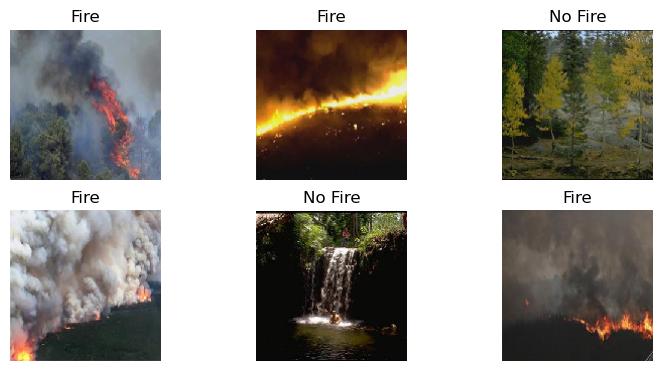

In [9]:
plot_data(train_dataset,7)

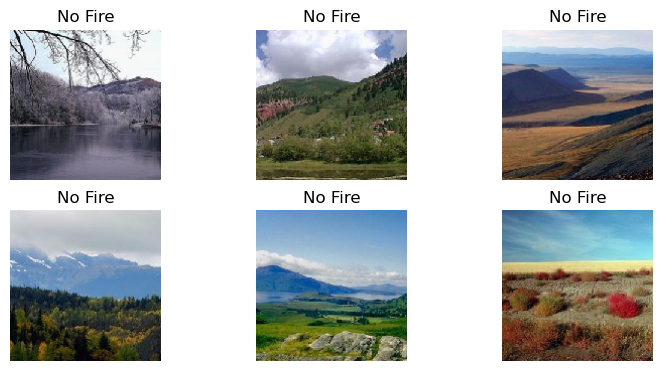

In [10]:
plot_data(test_dataset,7)

### Model Training
### Testing 3 different models
Xception,ResNet50 and InceptionV3 

In [11]:
# Build the Model
def build_model(base_conv) :
    
    rn.seed(42)
    model = models.Sequential()
    model.add(base_conv)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    base_conv.trainable = False

  
    
    return model
    

### Xception 

In [12]:
base_xc = Xception(weights="imagenet", 
                    include_top=False,
                    input_shape=(150, 150, 3))
model_xc = build_model(base_xc)


2022-12-21 22:22:15.462960: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-21 22:22:15.503545: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-21 22:22:15.503785: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LIFEBOOK-E557): /proc/driver/nvidia/version does not exist
2022-12-21 22:22:15.507469: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model_xc.compile(loss='binary_crossentropy', 
             optimizer='Adam', 
             metrics=['acc'],
             run_eagerly=True)
    
print(model_xc.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 33,969,193
Trainable params: 13,107,713
Non-trainable params: 20,861,480
_________________________________________________________________
None


In [14]:
history_xc = model_xc.fit_generator(train_dataset, epochs=10,
                    validation_data=test_dataset,
                           shuffle = False )


Epoch 1/10
58/58 [==============================] - 349s 6s/step - loss: 0.5363 - acc: 0.9498 - val_loss: 2.5071 - val_acc: 0.9265
Epoch 2/10
58/58 [==============================] - 344s 6s/step - loss: 0.2032 - acc: 0.9809 - val_loss: 0.6304 - val_acc: 0.9559
Epoch 3/10
58/58 [==============================] - 343s 6s/step - loss: 0.0754 - acc: 0.9891 - val_loss: 0.6772 - val_acc: 0.9706
Epoch 4/10
58/58 [==============================] - 344s 6s/step - loss: 0.0038 - acc: 0.9989 - val_loss: 0.3702 - val_acc: 0.9853
Epoch 5/10
58/58 [==============================] - 354s 6s/step - loss: 4.8738e-04 - acc: 1.0000 - val_loss: 0.3455 - val_acc: 0.9853
Epoch 6/10
58/58 [==============================] - 342s 6s/step - loss: 1.6082e-04 - acc: 1.0000 - val_loss: 0.3408 - val_acc: 0.9853
Epoch 7/10
58/58 [==============================] - 340s 6s/step - loss: 1.1576e-04 - acc: 1.0000 - val_loss: 0.3387 - val_acc: 0.9853
Epoch 8/10
58/58 [==============================] - 316s 5s/step - loss

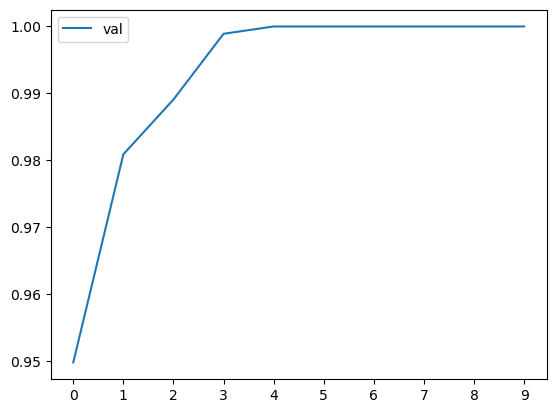

In [15]:
plt.plot(history_xc.history['acc'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [16]:
    
# Dictionary to extract the numbers 
hist_dict = history_xc.history

# Training and validation accuracy 
training_acc = hist_dict['acc']
validation_acc = hist_dict['val_acc']

# Training and validation loss 
training_loss = hist_dict['loss']
validation_loss = hist_dict['val_loss']

# Number of epochs 
epoches = range(1, 1 + len(training_acc))

In [17]:
def plot_func(entity):
    
    '''
    This function produces plot to compare the performance 
    between train set and validation set. 
    entity can be loss of accuracy. 
    '''
    
    plt.figure(figsize=(8, 5))
    plt.plot(epoches, eval('training_' + entity), 'r')
    plt.plot(epoches, eval('validation_' + entity), 'b')
    plt.legend(['Training ' + entity, 'Validation ' + entity])
    plt.xlabel('Epoches')
    plt.ylabel(entity)
    plt.show()

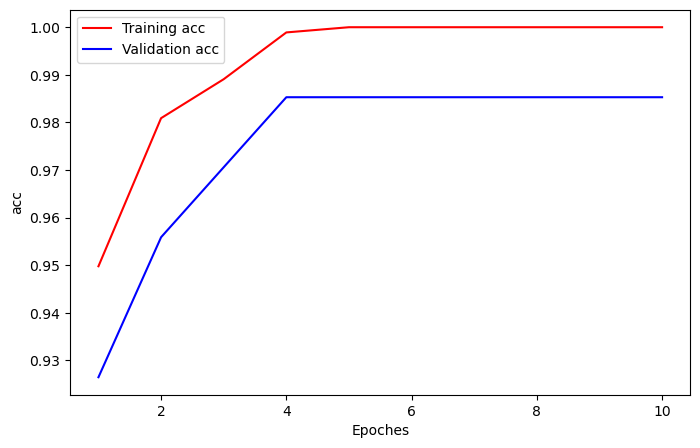

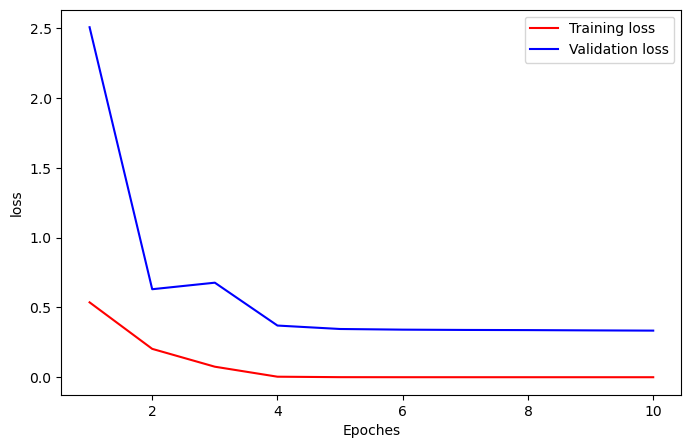

In [18]:
plot_func('acc')
plot_func('loss')

In [19]:
def evaluation(model):
    test_loss, test_acc = model.evaluate(test_dataset)
    print('test acc:', test_acc)
    print('test_loss:',test_loss)
    Y_pred = model.predict(test_dataset)
    predictions = np.round(Y_pred)
    import sklearn.metrics as metrics
    val_trues =test_dataset.classes
    from sklearn.metrics import classification_report, accuracy_score
    print(classification_report(val_trues, predictions))
    print(metrics.confusion_matrix(val_trues, predictions))
    print( "Accuracy: ", accuracy_score(val_trues,predictions))


In [20]:
evaluation(model_xc)

3/3 [==============================] - 3s 854ms/step - loss: 0.3339 - acc: 0.9853
test acc: 0.9852941036224365
test_loss: 0.33387884497642517
3/3 [==============================] - 3s 727ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.98      1.00      0.99        46

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.98        68
weighted avg       0.99      0.99      0.99        68

[[21  1]
 [ 0 46]]
Accuracy:  0.9852941176470589


### ResNet

In [21]:
base_rnet = ResNet50 (weights='imagenet', 
                     include_top=False,
                 input_shape=(150, 150, 3))

model_rnet = build_model(base_rnet)


In [22]:
model_rnet.compile(loss='binary_crossentropy', 
             optimizer='Adam', 
             metrics=['acc'],
             run_eagerly=True)
    
print(model_rnet.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               13107456  
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 36,695,425
Trainable params: 13,107,713
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [23]:
history_rnet = model_rnet.fit(train_dataset, epochs=10,
                    validation_data=test_dataset)

Epoch 1/10
58/58 [==============================] - 459s 8s/step - loss: 0.9076 - acc: 0.6337 - val_loss: 0.5559 - val_acc: 0.7059
Epoch 2/10
58/58 [==============================] - 418s 7s/step - loss: 0.4492 - acc: 0.8171 - val_loss: 0.4647 - val_acc: 0.7353
Epoch 3/10
58/58 [==============================] - 417s 7s/step - loss: 0.3608 - acc: 0.8641 - val_loss: 0.3667 - val_acc: 0.8529
Epoch 4/10
58/58 [==============================] - 459s 8s/step - loss: 0.2910 - acc: 0.8963 - val_loss: 0.3244 - val_acc: 0.8824
Epoch 5/10
58/58 [==============================] - 442s 8s/step - loss: 0.2719 - acc: 0.9001 - val_loss: 0.3292 - val_acc: 0.8676
Epoch 6/10
58/58 [==============================] - 406s 7s/step - loss: 0.2405 - acc: 0.9170 - val_loss: 0.2647 - val_acc: 0.8971
Epoch 7/10
58/58 [==============================] - 436s 7s/step - loss: 0.2261 - acc: 0.9225 - val_loss: 0.2753 - val_acc: 0.8971
Epoch 8/10
58/58 [==============================] - 389s 7s/step - loss: 0.2484 - a

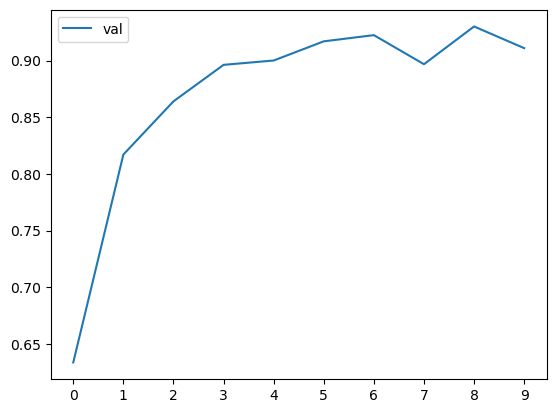

In [24]:
plt.plot(history_rnet.history['acc'], label='val')
plt.xticks(np.arange(10))
plt.legend()

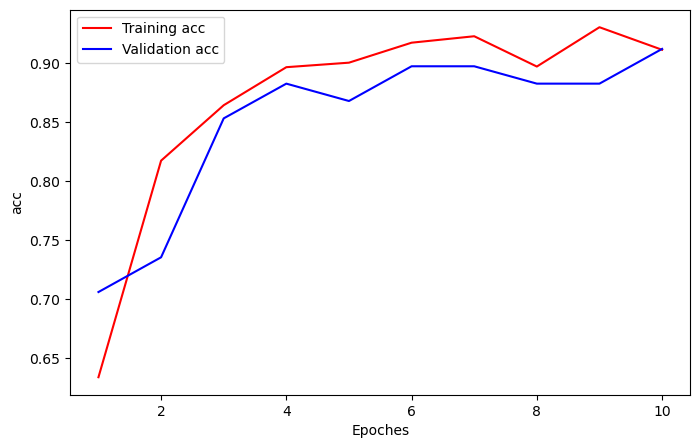

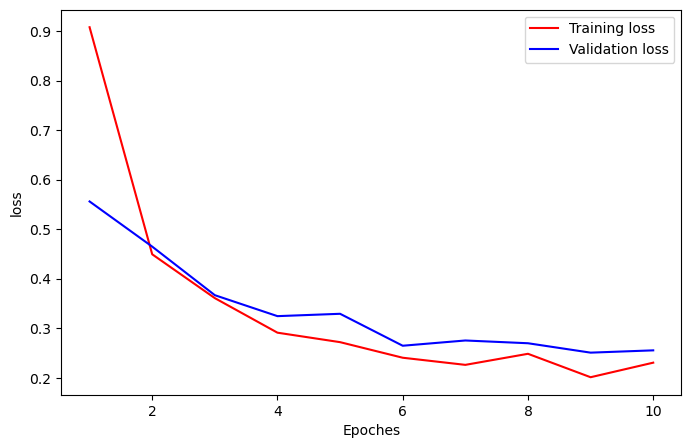

In [25]:
# Dictionary to extract the numbers 
hist_dict = history_rnet.history

# Training and validation accuracy 
training_acc = hist_dict['acc']
validation_acc = hist_dict['val_acc']

# Training and validation loss 
training_loss = hist_dict['loss']
validation_loss = hist_dict['val_loss']

# Number of epochs 
epoches = range(1, 1 + len(training_acc))
plot_func('acc')
plot_func('loss')


In [26]:
evaluation(model_rnet) 

3/3 [==============================] - 4s 919ms/step - loss: 0.2554 - acc: 0.9118
test acc: 0.9117646813392639
test_loss: 0.2553616762161255
3/3 [==============================] - 3s 775ms/step
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.92      0.96      0.94        46

    accuracy                           0.91        68
   macro avg       0.91      0.89      0.90        68
weighted avg       0.91      0.91      0.91        68

[[18  4]
 [ 2 44]]
Accuracy:  0.9117647058823529


### Inception

In [27]:
base_inc = InceptionV3 (weights='imagenet', 
                     include_top=False,
                 input_shape=(150, 150, 3))

model_inc = build_model(base_inc)


In [28]:
model_inc.compile(loss='binary_crossentropy', 
             optimizer='Adam', 
             metrics=['acc'],
             run_eagerly=True)
    
print(model_inc.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4718848   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26,521,889
Trainable params: 4,719,105
Non-trainable params: 21,802,784
_________________________________________________________________
None


In [29]:
history_inc = model_inc.fit(train_dataset, epochs=10,
                    validation_data=test_dataset)

Epoch 1/10
58/58 [==============================] - 209s 4s/step - loss: 1.1266 - acc: 0.8930 - val_loss: 0.0719 - val_acc: 0.9559
Epoch 2/10
58/58 [==============================] - 235s 4s/step - loss: 0.0664 - acc: 0.9847 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 3/10
58/58 [==============================] - 227s 4s/step - loss: 0.0334 - acc: 0.9934 - val_loss: 0.0226 - val_acc: 0.9853
Epoch 4/10
58/58 [==============================] - 221s 4s/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 5/10
58/58 [==============================] - 222s 4s/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 1.0000
Epoch 6/10
58/58 [==============================] - 215s 4s/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0075 - val_acc: 1.0000
Epoch 7/10
58/58 [==============================] - 229s 4s/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 8/10
58/58 [==============================] - 215s 4s/step - loss: 8.3735e-04

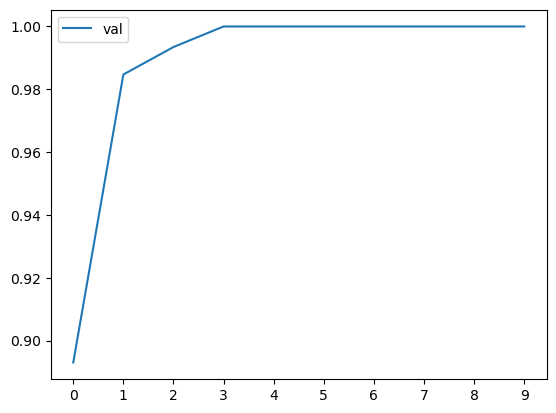

In [30]:
plt.plot(history_inc.history['acc'], label='val')
plt.xticks(np.arange(10))
plt.legend()

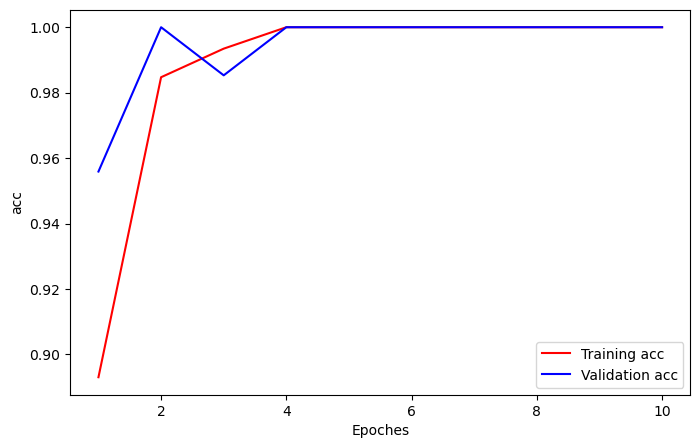

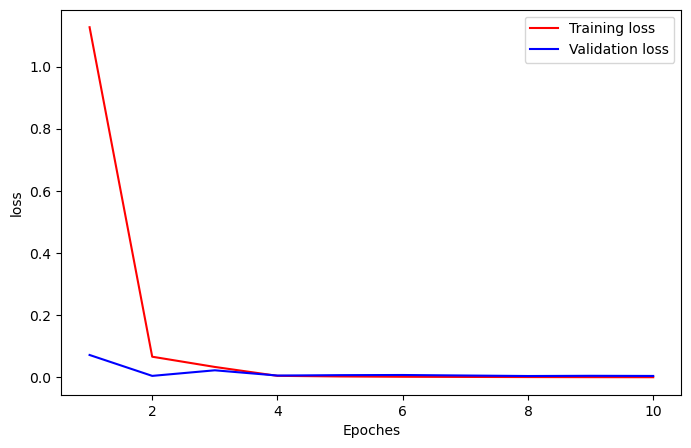

In [31]:
# Dictionary to extract the numbers 
hist_dict = history_inc.history

# Training and validation accuracy 
training_acc = hist_dict['acc']
validation_acc = hist_dict['val_acc']

# Training and validation loss 
training_loss = hist_dict['loss']
validation_loss = hist_dict['val_loss']

# Number of epochs 
epoches = range(1, 1 + len(training_acc))

plot_func('acc')
plot_func('loss')

In [32]:
evaluation(model_inc) 

3/3 [==============================] - 2s 475ms/step - loss: 0.0045 - acc: 1.0000
test acc: 1.0
test_loss: 0.004452901426702738
3/3 [==============================] - 2s 476ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        46

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

[[22  0]
 [ 0 46]]
Accuracy:  1.0


### Comparision between the models

#### Inception is the best one  : it has the best accuracy with the lower loss value

### Test Prediction on Some Images 

In [33]:
def plot_prediction(model,generator, n_images):
    """
    Test the model on random predictions
    Args:
    the best model
    generator: a generator instance
    n_images : number of images to plot

    """
    class_names = ['Fire', 'No Fire'] 
    i = 1
    # Get the images and the labels from the generator
    images, labels = generator.next()
    # Gets the model predictions
    labels = labels.astype('int32')
    plt.figure(figsize=(12, 12))
    for image, label in zip(images, labels):
        pred = model.predict(images)
        predictions = np.round(pred)
       
  
        plt.subplot(4, 3, i)
        plt.imshow(image)
        
        if predictions[i] == labels[i]: 
            title_obj = plt.title(class_names[label])
            print('True Class : ' +class_names[label])
            print('Predicted Class: ' + class_names[int(predictions[i])] )
            print("Probability NO FIRE : ", round(float(pred[i])* 100,3) ,"%")
            plt.setp(title_obj, color='g')  
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            print('True Class : ' +class_names[label])
            print('Predicted Class: ' + class_names[int(predictions[i])])
            print("Probability NO FIRE: ", round(float(pred[i])* 100,3) ,"%")
            plt.setp(title_obj, color='r')  
            plt.axis('off')
        i += 1
        if i == n_images:
            break
    
    plt.show()

1/1 [==============================] - 1s 1s/step
True Class : No Fire
Predicted Class: No Fire
Probability NO FIRE :  99.907 %
1/1 [==============================] - 0s 288ms/step
True Class : No Fire
Predicted Class: No Fire
Probability NO FIRE :  100.0 %
1/1 [==============================] - 0s 263ms/step
True Class : No Fire
Predicted Class: No Fire
Probability NO FIRE :  99.819 %


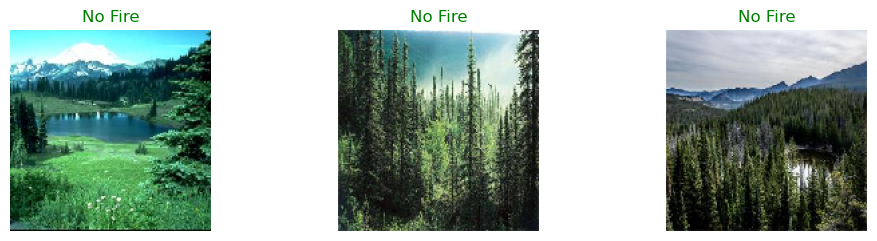

In [34]:
plot_prediction(model_inc,test_dataset, 4)

### Predict other images (not from the test dataset)

In [35]:
def predimage(path):
    image = Image.open(path)
    plt.imshow(image)
    img = load_img(path,target_size=(150,150))
    img = img_to_array(test)
    img = np.expand_dims(test,axis=0)
    img /= 255
    result = model_inc.predict(test)
    y_class = np.round(result)
    result = (result*100)
    y_class = int(y_class)
    print("Probability NO FIRE: ", round(float(result), 4), "%")
    y = list(train_dataset.class_indices.keys())
    plt.xlabel(y[y_class],fontsize=30)

1/1 [==============================] - 0s 217ms/step
Probability NO FIRE:  99.9904 %


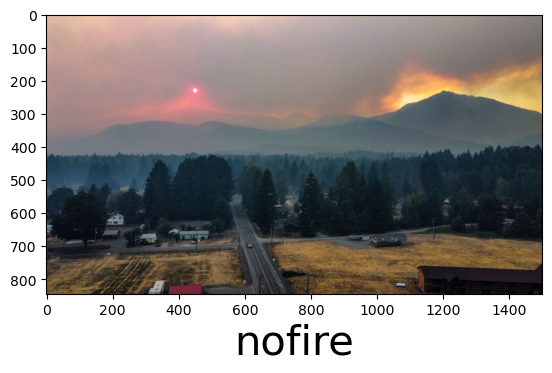

In [36]:
predimage("./forest_fire_data/images/002.jpg");

1/1 [==============================] - 0s 170ms/step
Probability NO FIRE:  100.0 %


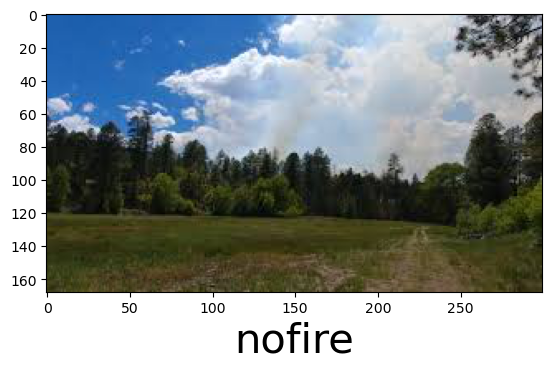

In [37]:
predimage("./forest_fire_data/images/003.jpg");

1/1 [==============================] - 0s 225ms/step
Probability NO FIRE:  100.0 %


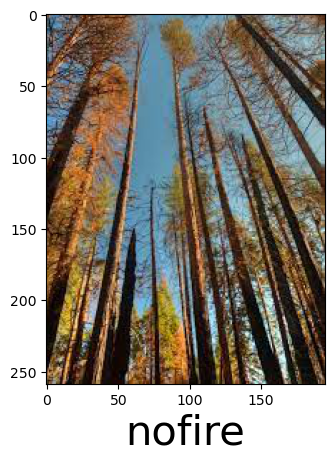

In [38]:
predimage("./forest_fire_data/images/004.jpg");

1/1 [==============================] - 0s 318ms/step
Probability NO FIRE:  0.0 %


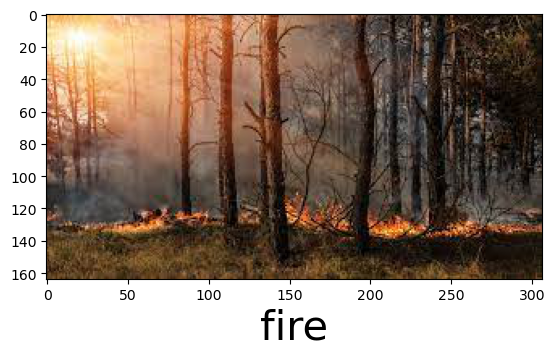

In [39]:
predimage("./forest_fire_data/images/006.jpg");

1/1 [==============================] - 0s 192ms/step
Probability NO FIRE:  0.0 %


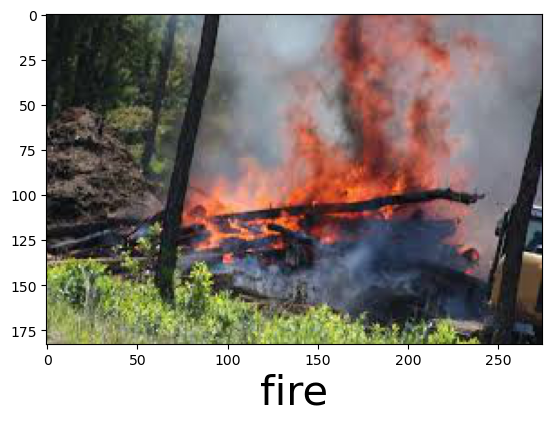

In [40]:
predimage("./forest_fire_data/images/007.jpg");

1/1 [==============================] - 0s 232ms/step
Probability NO FIRE:  8.1188 %


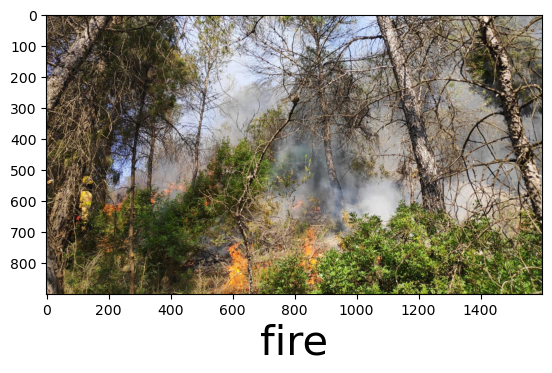

In [41]:
predimage("./forest_fire_data/images/008.jpg");

### Saving the choosing model 

In [53]:
model_inc.save('model_inc_final.h5', save_format='h5')

### Convert model to TFLite

In [2]:
import tensorflow as tf
import keras
model = keras.models.load_model('model_inc_final.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)

model_lite = converter.convert()

2022-12-22 08:44:17.866861: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-22 08:44:17.874355: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-22 08:44:17.874632: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LIFEBOOK-E557): /proc/driver/nvidia/version does not exist
2022-12-22 08:44:17.923754: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Assets written to: /tmp/tmp0bqszlsm/assets


INFO:tensorflow:Assets written to: /tmp/tmp0bqszlsm/assets
2022-12-22 08:45:13.394125: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-22 08:45:13.394203: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-22 08:45:13.407995: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp0bqszlsm
2022-12-22 08:45:13.484857: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-22 08:45:13.484892: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmp0bqszlsm
2022-12-22 08:45:13.683171: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2022-12-22 08:45:13.734246: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-22 08:45:15.504756: I tensorflow/cc/saved_model/loader.cc:213] Running initializatio

In [3]:
with open('model.tflite', 'wb') as f_out:
    f_out.write(model_lite)